<a href="https://colab.research.google.com/github/mashin0714/Analytic-Projects/blob/main/quit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier


In [2]:
!git clone https://github.com/mashin0714/bootcamp2.git

Cloning into 'bootcamp2'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 68 (delta 5), reused 0 (delta 0), pack-reused 50
Receiving objects: 100% (68/68), 18.03 MiB | 15.41 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mashin0714/bootcamp2/main/quit.csv', encoding="big5")

In [4]:
data

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,序號,是否離職,年齡,性別,婚姻狀態,是否有大學學歷,是否有碩士學歷,是否有博士學歷,最高學歷學校等級,外部經歷總公司數,...,單位_第一層,單位_第二層,單位_第三層,個性分群,職能強項,職能弱項,職能驚喜,職能盲點,績效,是否為關鍵人才
0,1,0,71,男性,已婚,YES,NO,YES,其他,0,...,04C0000,04C0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,45,男性,已婚,NaN,NaN,NaN,NaN,0,...,04C0000,04C0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1,43,女性,已婚,YES,YES,NO,一級,5,...,04C0000,04C0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,0,65,男性,已婚,YES,NO,NO,二級,0,...,0DC0000,0DC2000,0DC2600,樂觀關係型,NaN,NaN,NaN,NaN,NaN,NaN
4,19,1,64,男性,已婚,YES,NO,NO,一級,0,...,0DC0000,0DC2000,0DC2600,保守穩定型,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1519,1,33,男性,未婚,YES,YES,NO,一級,0,...,08C0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,True
1080,1520,1,33,女性,未婚,YES,YES,NO,二級,0,...,0DC0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,True
1081,1521,0,25,女性,未婚,YES,NO,NO,其他,0,...,01C0000,01C6000,NaN,NaN,對話力,NaN,NaN,NaN,4.0,False
1082,1522,0,65,男性,已婚,YES,YES,NO,一級,1,...,01C0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,True


In [7]:
data.describe()

,序號,是否離職,年齡,外部經歷總公司數,外部經歷總年資,集團年資,公司年資,一級主管序號,廣義管理幅度,狹義管理幅度,距上次升遷時長,績效
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1075.000000,1084.000000,1084.000000,268.000000,626.000000
mean,901.461255,0.493542,32.015683,1.477860,3.443678,3.804718,2.275169,985.333953,1.194649,0.459410,2.296269,4.487380
std,403.743098,0.500189,8.436758,1.756788,5.120593,5.838942,3.059638,584.406208,13.006708,2.498608,2.395733,0.854756
min,1.000000,0.000000,19.000000,0.000000,0.000000,0.002740,0.002740,3.000000,0.000000,0.000000,0.000000,2.200000
25%,649.750000,0.000000,25.000000,0.000000,0.000000,0.498174,0.435160,411.000000,0.000000,0.000000,0.900000,4.000000
50%,950.500000,0.000000,30.000000,1.000000,1.058904,1.520548,1.064384,951.000000,0.000000,0.000000,1.900000,4.500000
75%,1230.250000,1.000000,37.000000,3.000000,5.182420,4.489269,2.966667,1554.000000,0.000000,0.000000,2.900000,5.000000
max,1523.000000,1.000000,71.000000,11.000000,45.933562,46.799315,21.149087,1589.000000,388.000000,25.000000,16.100000,6.000000


In [8]:
data['是否離職'].value_counts()

0    549
1    535
Name: 是否離職, dtype: int64

In [193]:
sum(data.duplicated(data.columns))

0

In [9]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull())))
describe_data(data)

Data Types:
序號             int64
是否離職           int64
年齡             int64
性別            object
婚姻狀態          object
是否有大學學歷       object
是否有碩士學歷       object
是否有博士學歷       object
最高學歷學校等級      object
外部經歷總公司數       int64
外部經歷總年資      float64
集團年資         float64
公司年資         float64
一級主管序號       float64
是否為主管           bool
廣義管理幅度         int64
狹義管理幅度         int64
職位層級          object
是否為STEM人才       bool
是否有兼職           bool
距上次升遷時長      float64
單位            object
單位層級          object
單位_第一層        object
單位_第二層        object
單位_第三層        object
個性分群          object
職能強項          object
職能弱項          object
職能驚喜          object
職能盲點          object
績效           float64
是否為關鍵人才       object
dtype: object
Rows and Columns:
(1084, 33)
Column Names:
Index(['序號', '是否離職', '年齡', '性別', '婚姻狀態', '是否有大學學歷', '是否有碩士學歷', '是否有博士學歷',
       '最高學歷學校等級', '外部經歷總公司數', '外部經歷總年資', '集團年資', '公司年資', '一級主管序號', '是否為主管',
       '廣義管理幅度', '狹義管理幅度', '職位層級', '是否為STEM人才', '是否有兼職', '距上次升遷時長', '單位',
       '單位層級'

In [10]:
dat = data.drop('序號', axis=1)

In [11]:
objects = []
for c in dat.columns:
    if str(dat[c].dtype) == 'object':
        objects.append(c)

X_ = dat.drop(objects, axis = 1).astype('float64')
dummies = pd.get_dummies(data[objects], drop_first=True)
quit = pd.concat([X_, dummies], axis = 1)
quit

,是否離職,年齡,外部經歷總公司數,外部經歷總年資,集團年資,公司年資,一級主管序號,是否為主管,廣義管理幅度,狹義管理幅度,...,職能盲點_持續改善 對話力,職能盲點_持續改善 敏捷力,職能盲點_指導,職能盲點_指導 計劃與組織能力,職能盲點_指導與發展人才,職能盲點_敏捷力,職能盲點_敏捷力 學習力,職能盲點_計劃與組織能力,職能盲點_計劃與組織能力 敏捷力,是否為關鍵人才_True
0,0.0,71.0,0.0,0.000000,46.799315,6.702283,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,45.0,0.0,0.000000,10.527397,9.680365,1547.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,43.0,5.0,18.270091,3.355251,3.355251,1546.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,65.0,0.0,0.000000,40.993379,11.393607,384.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,64.0,0.0,0.000000,38.479680,0.998858,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1.0,33.0,0.0,0.000000,0.793836,0.793836,681.0,1.0,23.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1080,1.0,33.0,0.0,0.000000,0.293836,0.293836,233.0,1.0,388.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1081,0.0,25.0,0.0,0.000000,2.541096,2.541096,203.0,1.0,9.0,9.0,...,0,0,0,0,0,0,0,0,0,0
1082,0.0,65.0,1.0,2.079452,37.419406,21.149087,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
quit.head()

,是否離職,年齡,外部經歷總公司數,外部經歷總年資,集團年資,公司年資,一級主管序號,是否為主管,廣義管理幅度,狹義管理幅度,...,職能盲點_持續改善 對話力,職能盲點_持續改善 敏捷力,職能盲點_指導,職能盲點_指導 計劃與組織能力,職能盲點_指導與發展人才,職能盲點_敏捷力,職能盲點_敏捷力 學習力,職能盲點_計劃與組織能力,職能盲點_計劃與組織能力 敏捷力,是否為關鍵人才_True
0,0.0,71.0,0.0,0.000000,46.799315,6.702283,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,45.0,0.0,0.000000,10.527397,9.680365,1547.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,43.0,5.0,18.270091,3.355251,3.355251,1546.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,65.0,0.0,0.000000,40.993379,11.393607,384.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,64.0,0.0,0.000000,38.479680,0.998858,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def describe_data(df):
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull())))
describe_data(quit)

Column Names:
Index(['是否離職', '年齡', '外部經歷總公司數', '外部經歷總年資', '集團年資', '公司年資', '一級主管序號', '是否為主管',
       '廣義管理幅度', '狹義管理幅度',
       ...
       '職能盲點_持續改善 對話力', '職能盲點_持續改善 敏捷力', '職能盲點_指導', '職能盲點_指導 計劃與組織能力',
       '職能盲點_指導與發展人才', '職能盲點_敏捷力', '職能盲點_敏捷力 學習力', '職能盲點_計劃與組織能力',
       '職能盲點_計劃與組織能力 敏捷力', '是否為關鍵人才_True'],
      dtype='object', length=338)
Null Values:
是否離職                0
年齡                  0
外部經歷總公司數            0
外部經歷總年資             0
集團年資                0
                   ..
職能盲點_敏捷力            0
職能盲點_敏捷力 學習力        0
職能盲點_計劃與組織能力        0
職能盲點_計劃與組織能力 敏捷力    0
是否為關鍵人才_True        0
Length: 338, dtype: int64


## Set font in Mandarin

In [14]:
from matplotlib.font_manager import findfont, FontProperties


findfont(FontProperties(family=FontProperties().get_family()))

'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [15]:
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist]

['STIXNonUnicode',
 'STIXSizeFourSym',
 'cmtt10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'cmb10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans Display',
 'cmsy10',
 'cmmi10',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'cmr10',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXGeneral',
 'cmex10',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Humor Sans',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Mon

In [17]:
from matplotlib import font_manager
font_path = r'Source Han Sans CN Normal.otf'  # Corrected font path without escaping spaces
font_manager.fontManager.addfont(font_path)

plt.rcParams['font.family'] = 'Source Han Sans CN'

# Set seaborn style and font
sns.set_style("darkgrid", {"font.sans-serif": ['Source Han Sans CN']})

In [18]:
quit.head()

,是否離職,年齡,外部經歷總公司數,外部經歷總年資,集團年資,公司年資,一級主管序號,是否為主管,廣義管理幅度,狹義管理幅度,...,職能盲點_持續改善 對話力,職能盲點_持續改善 敏捷力,職能盲點_指導,職能盲點_指導 計劃與組織能力,職能盲點_指導與發展人才,職能盲點_敏捷力,職能盲點_敏捷力 學習力,職能盲點_計劃與組織能力,職能盲點_計劃與組織能力 敏捷力,是否為關鍵人才_True
0,0.0,71.0,0.0,0.000000,46.799315,6.702283,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,45.0,0.0,0.000000,10.527397,9.680365,1547.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,43.0,5.0,18.270091,3.355251,3.355251,1546.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,65.0,0.0,0.000000,40.993379,11.393607,384.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,64.0,0.0,0.000000,38.479680,0.998858,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


##Clustering

In [19]:
quit_fill = quit.fillna(0)

In [20]:
scaler = MinMaxScaler()
scaler.fit(quit_fill)
quit_sc = scaler.transform(quit_fill)
quit_sc

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.46153846, 0.45454545, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.11538462, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.88461538, 0.09090909, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.78846154, 0.18181818, ..., 0.        , 0.        ,
        1.        ]])

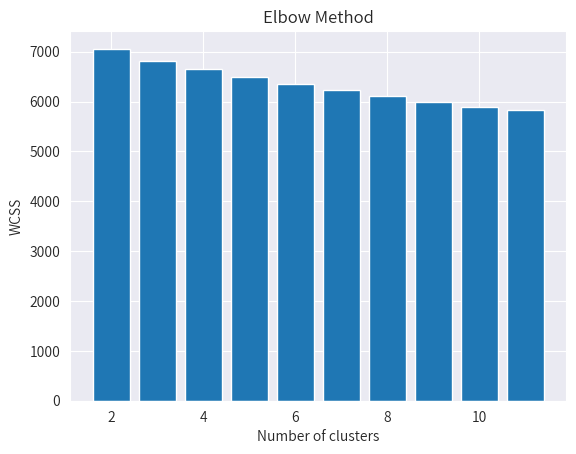

In [21]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(quit_sc)
    wcss.append(kmeans.inertia_)
plt.bar(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeans.fit(quit_sc)

KMeans(max_iter=1000, n_clusters=4, n_init=10, random_state=0)

In [23]:
quit['k_means_cl'] = kmeans.labels_

In [24]:
quit[quit['k_means_cl'] == 0]['是否離職'].mean()

0.39628482972136225

In [25]:
quit[quit['k_means_cl'] == 1]['是否離職'].mean()

0.9857651245551602

In [26]:
quit[quit['k_means_cl'] == 2]['是否離職'].mean()

0.4784688995215311

In [27]:
quit[quit['k_means_cl'] == 3]['是否離職'].mean()

0.11070110701107011

In [28]:
def relab(label):
  if label == 0:
    return 1
  elif label == 1:
    return 3
  elif label == 2:
    return 2
  else:
    return 0

In [29]:
kmlab = list(map(relab, kmeans.labels_))

In [30]:
quit['k_means_cl'] = kmlab

In [31]:
quit.head()

,是否離職,年齡,外部經歷總公司數,外部經歷總年資,集團年資,公司年資,一級主管序號,是否為主管,廣義管理幅度,狹義管理幅度,...,職能盲點_持續改善 敏捷力,職能盲點_指導,職能盲點_指導 計劃與組織能力,職能盲點_指導與發展人才,職能盲點_敏捷力,職能盲點_敏捷力 學習力,職能盲點_計劃與組織能力,職能盲點_計劃與組織能力 敏捷力,是否為關鍵人才_True,k_means_cl
0,0.0,71.0,0.0,0.000000,46.799315,6.702283,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,45.0,0.0,0.000000,10.527397,9.680365,1547.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,43.0,5.0,18.270091,3.355251,3.355251,1546.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,65.0,0.0,0.000000,40.993379,11.393607,384.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,64.0,0.0,0.000000,38.479680,0.998858,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3


<Axes: xlabel='k_means_cl', ylabel='年齡'>

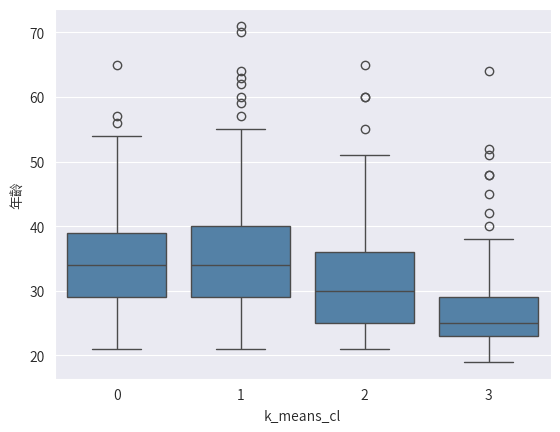

In [32]:
sns.boxplot(x = "k_means_cl", y = "年齡", data = quit, color = 'steelblue')

<Axes: xlabel='k_means_cl', ylabel='外部經歷總年資'>

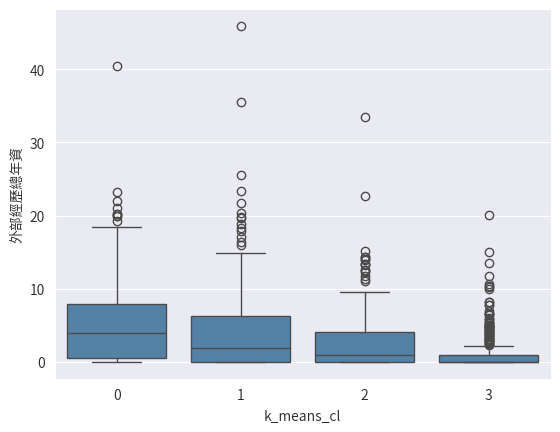

In [33]:
sns.boxplot(x = "k_means_cl", y = "外部經歷總年資", data = quit, color = 'steelblue')

<Axes: xlabel='k_means_cl', ylabel='外部經歷總公司數'>

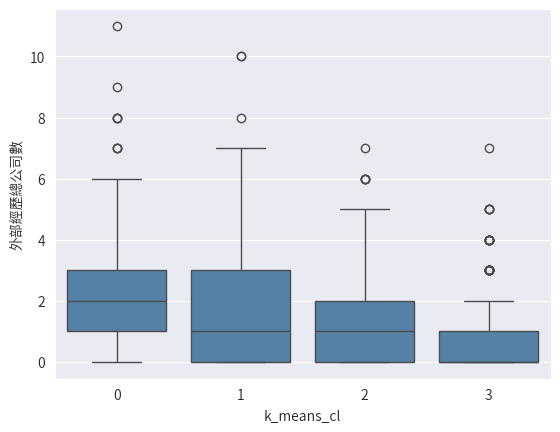

In [34]:
sns.boxplot(x = "k_means_cl", y = "外部經歷總公司數", data = quit, color = 'steelblue')

<Axes: xlabel='k_means_cl', ylabel='集團年資'>

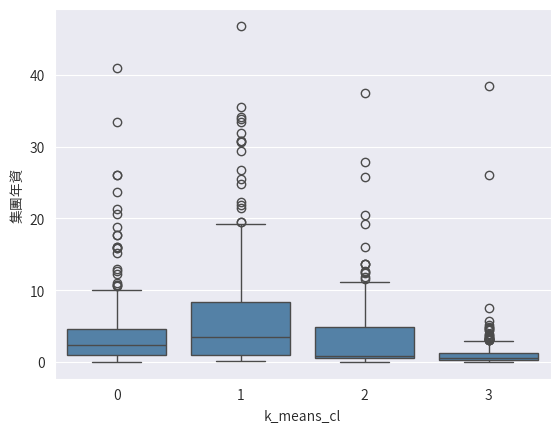

In [81]:
sns.boxplot(x = "k_means_cl", y = "集團年資", data = quit, color = 'steelblue')

<Axes: xlabel='k_means_cl', ylabel='公司年資'>

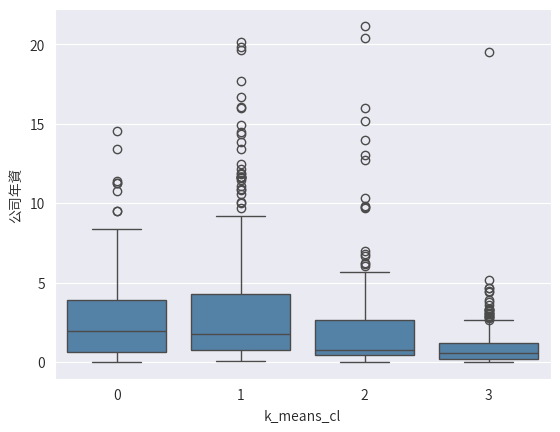

In [35]:
sns.boxplot(x = "k_means_cl", y = "公司年資", data = quit, color = 'steelblue')

## 探索性分析

Text(0, 0.5, '平均外部經歷總公司數')

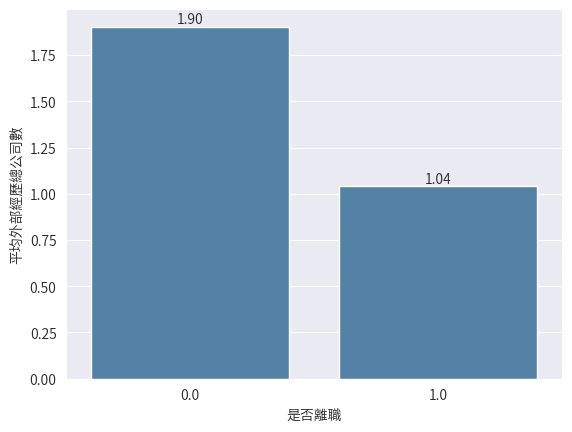

In [101]:
average_by_num_company = quit.groupby('是否離職')['外部經歷總公司數'].mean()
num_company = sns.barplot(x=average_by_num_company.index, y=average_by_num_company.values, color = 'steelblue')
for i, v in enumerate(average_by_num_company.values):
    num_company.text(i, v + 0.001, '{:.2f}'.format(v), ha='center', va='bottom')
plt.ylabel('平均外部經歷總公司數')

Text(0, 0.5, '平均集團年資')

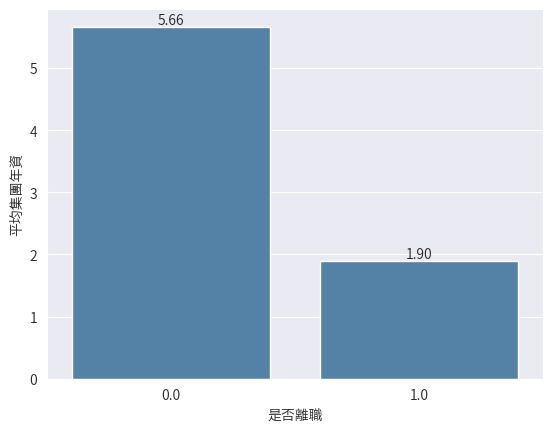

In [102]:
average_by_work_year_group = quit.groupby('是否離職')['集團年資'].mean()
work_year_group = sns.barplot(x=average_by_work_year_group.index, y=average_by_work_year_group.values, color = 'steelblue')
for i, v in enumerate(average_by_work_year_group.values):
    work_year_group.text(i, v + 0.001, '{:.2f}'.format(v), ha='center', va='bottom')
plt.ylabel('平均集團年資')

Text(0, 0.5, '平均公司年資')

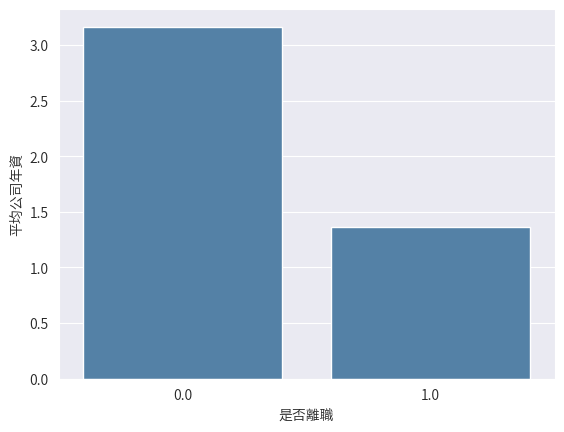

In [39]:
average_by_work_year_company = quit.groupby('是否離職')['公司年資'].mean()
sns.barplot(x=average_by_work_year_company.index, y=average_by_work_year_company.values, color = 'steelblue')

plt.ylabel('平均公司年資')

Text(0, 0.5, '平均外部經歷總年資')

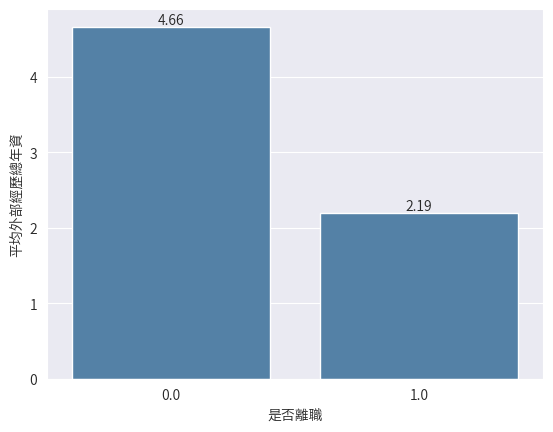

In [103]:
average_by_work_year = quit.groupby('是否離職')['外部經歷總年資'].mean()
work_year = sns.barplot(x=average_by_work_year.index, y=average_by_work_year.values, color = 'steelblue')
for i, v in enumerate(average_by_work_year.values):
    work_year.text(i, v + 0.001, '{:.2f}'.format(v), ha='center', va='bottom')
plt.ylabel('平均外部經歷總年資')

<ipython-input-36-07e2d3e641e0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0, 0.5, '平均離職機率')

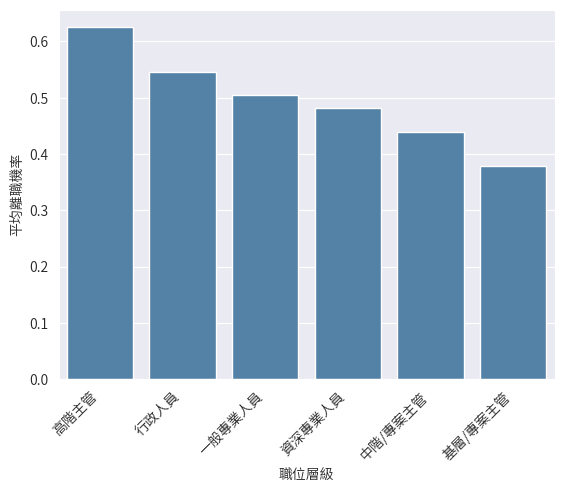

In [36]:
average_by_num_company = data.groupby('職位層級')['是否離職'].mean()
average_by_job_level = data.groupby('職位層級')['是否離職'].mean().sort_values(ascending=False)

ax = sns.barplot(x=average_by_job_level.index, y=average_by_job_level.values, color='steelblue', order=average_by_job_level.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('平均離職機率')

<ipython-input-41-430e274ee6a0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  by_dpt.set_xticklabels(by_dpt.get_xticklabels(), rotation=90, ha='right')


[Text(0, 0, '04C0000'),
 Text(1, 0, '0DC0000'),
 Text(2, 0, '03C0000'),
 Text(3, 0, '01C0000'),
 Text(4, 0, '0BC0000'),
 Text(5, 0, '02C0000'),
 Text(6, 0, '0AC0000'),
 Text(7, 0, '09C0000'),
 Text(8, 0, '08C0000'),
 Text(9, 0, '06C0000'),
 Text(10, 0, '05C0000'),
 Text(11, 0, '07C0000')]

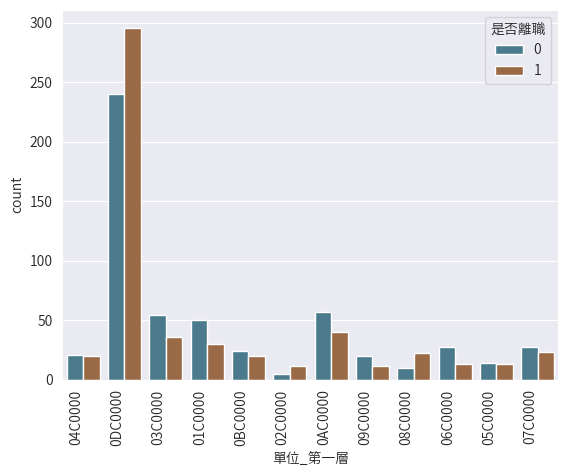

In [41]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_dpt = sns.countplot(x="單位_第一層", hue="是否離職", data=dat[dat.單位_第一層.isin(['0DC0000', '0AC0000', '03C0000', '01C0000', '07C0000', '0BC0000', '04C0000', '06C0000', '08C0000', '09C0000', '05C0000', '02C0000'])], palette=aq_palette)
by_dpt.set_xticklabels(by_dpt.get_xticklabels(), rotation=90, ha='right')

<ipython-input-5-beccb911b19c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10.index, rotation=45, ha='right')


Text(0, 0.5, '離職總人數')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 32026 (\N{CJK UNIFIED IDEOGRAPH-7D1A}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-86

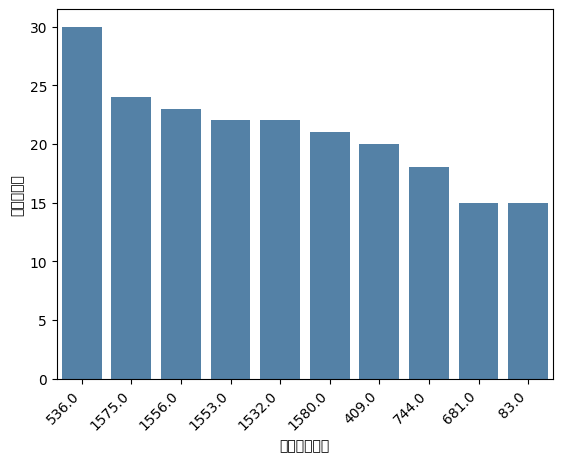

In [5]:
average_by_job_level = data.groupby('一級主管序號')['是否離職'].sum().sort_values(ascending=False)
top_10 = average_by_job_level.head(10)
ax = sns.barplot(x=top_10.index, y=top_10.values, color='steelblue', order=top_10.index)

ax.set_xticklabels(top_10.index, rotation=45, ha='right')
plt.ylabel('離職總人數')

Text(0, 0.5, '平均離職機率')

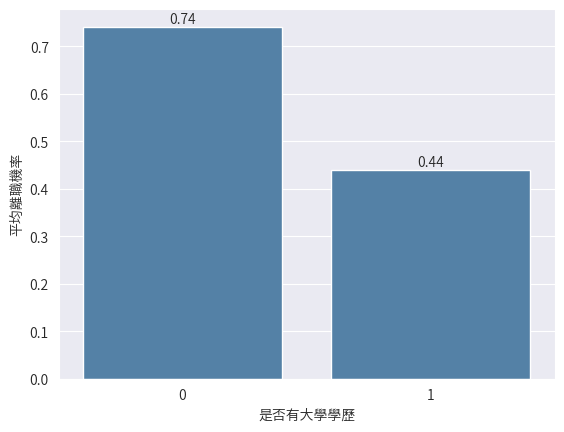

In [98]:
average_by_bach = quit.groupby('是否有大學學歷_YES')['是否離職'].mean()
bach = sns.barplot(x=average_by_bach.index, y=average_by_bach.values,color = 'steelblue')
for i, v in enumerate(average_by_bach.values):
    bach.text(i, v + 0.001, '{:.2f}'.format(v), ha='center', va='bottom')
plt.xlabel('是否有大學學歷')
plt.ylabel('平均離職機率')

Text(0, 0.5, '平均離職機率')

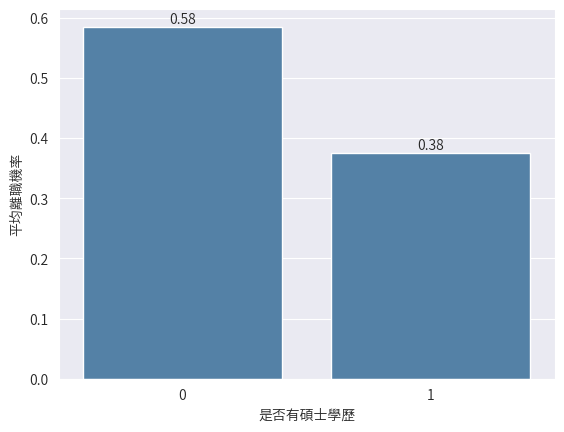

In [99]:
average_by_master = quit.groupby('是否有碩士學歷_YES')['是否離職'].mean()
master = sns.barplot(x=average_by_master.index, y=average_by_master.values,color = 'steelblue')
for i, v in enumerate(average_by_master.values):
    master.text(i, v + 0.001, '{:.2f}'.format(v), ha='center', va='bottom')
plt.xlabel('是否有碩士學歷')
plt.ylabel('平均離職機率')

Text(0, 0.5, '平均離職機率')

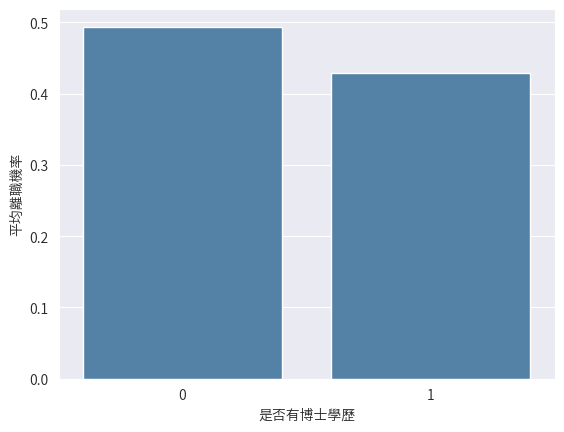

In [44]:
average_by_phd = quit.groupby('是否有博士學歷_YES')['是否離職'].mean()
sns.barplot(x=average_by_phd.index, y=average_by_phd.values,color = 'steelblue')
plt.xlabel('是否有博士學歷')
plt.ylabel('平均離職機率')

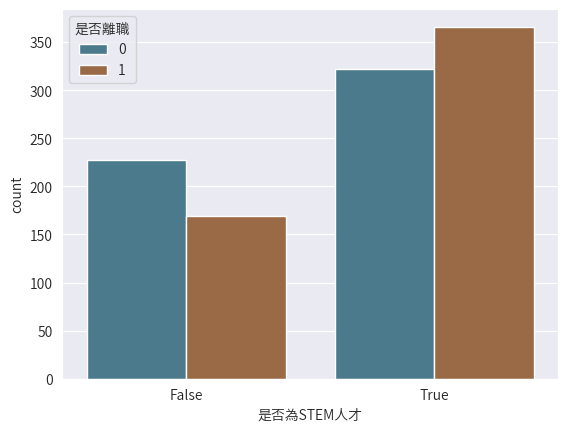

In [47]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_stem = sns.countplot(x='是否為STEM人才', hue="是否離職", data=dat[dat.是否為STEM人才.isin([True, False])], palette=aq_palette)

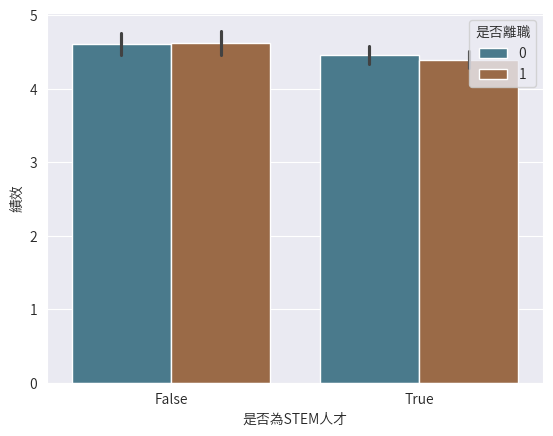

In [166]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_stem = sns.barplot(x='是否為STEM人才', y= '績效', hue="是否離職", data=dat[dat.是否為STEM人才.isin([True, False])], palette=aq_palette)

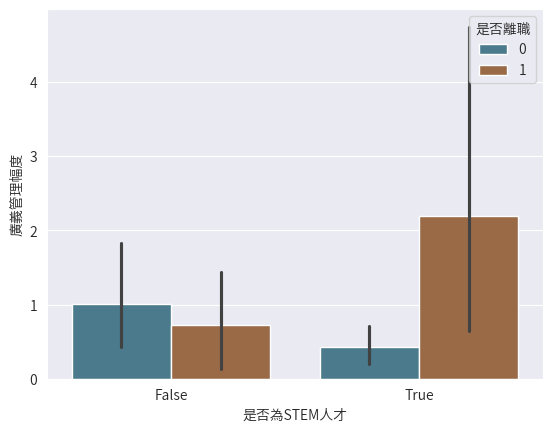

In [141]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_stem = sns.barplot(x='是否為STEM人才', y= '廣義管理幅度', hue="是否離職", data=dat[dat.是否為STEM人才.isin([True, False])], palette=aq_palette)

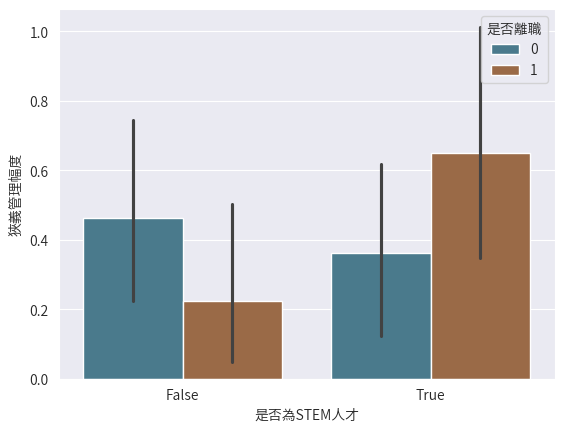

In [144]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_stem = sns.barplot(x='是否為STEM人才', y= '狹義管理幅度', hue="是否離職", data=dat[dat.是否為STEM人才.isin([True, False])], palette=aq_palette)

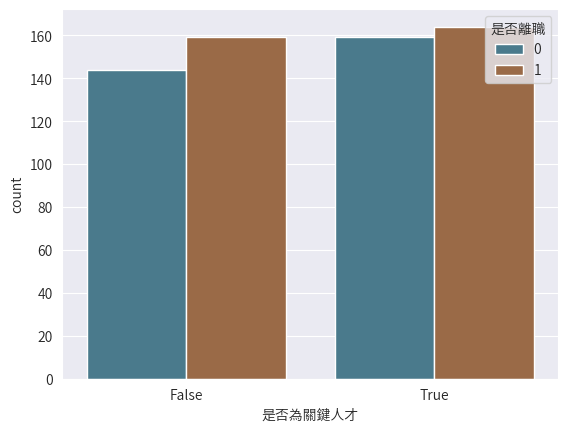

In [190]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_stem = sns.countplot(x='是否為關鍵人才', hue="是否離職", data=dat[dat.是否為關鍵人才.isin([True, False])], palette=aq_palette)

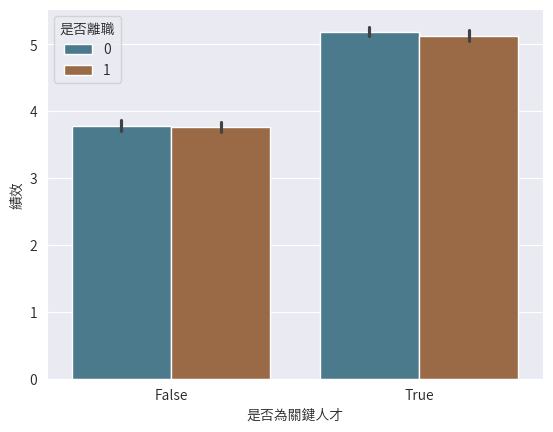

In [162]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_stem = sns.barplot(x='是否為關鍵人才', y= '績效', hue="是否離職", data=dat[dat.是否為關鍵人才.isin([True, False])], palette=aq_palette)

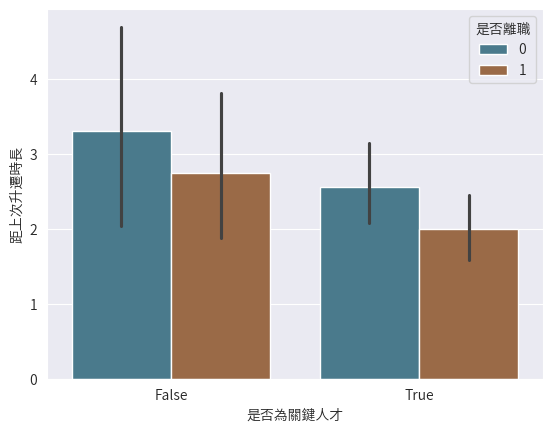

In [191]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_stem = sns.barplot(x='是否為關鍵人才', y= '距上次升遷時長', hue="是否離職", data=dat[dat.是否為關鍵人才.isin([True, False])], palette=aq_palette)

## Heatmap

<Axes: >

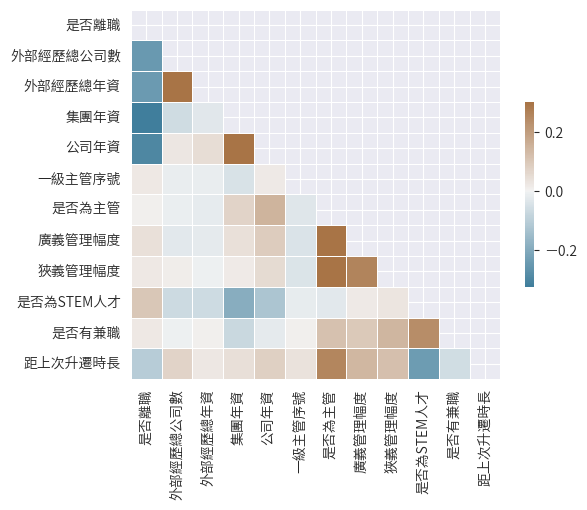

In [48]:
columns_1 = quit.iloc[:,[0]+list(range(2,13))]
mask = np.triu(np.ones_like(columns_1.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 40, as_cmap=True)
sns.heatmap(columns_1.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

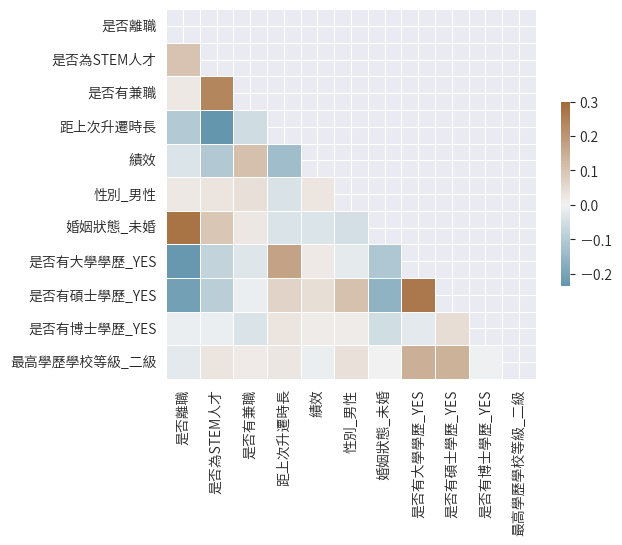

In [49]:
columns_1 = quit.iloc[:, [0] + list(range(10, 20))]
mask = np.triu(np.ones_like(columns_1.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 40, as_cmap=True)
sns.heatmap(columns_1.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

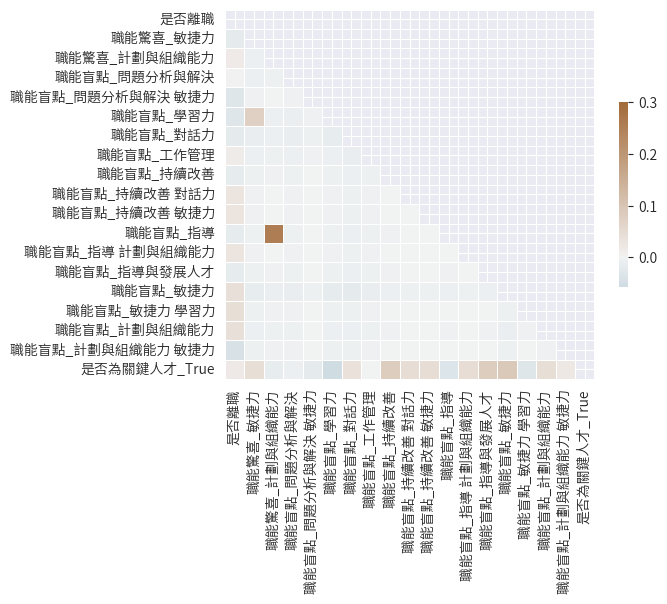

In [50]:
columns_1 = quit.iloc[:, [0] + list(range(320, 338))]
mask = np.triu(np.ones_like(columns_1.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 40, as_cmap=True)
sns.heatmap(columns_1.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### split data

In [51]:
np.random.seed(42)
train, test = train_test_split(quit_fill, test_size = 0.5)
val, test = train_test_split(test, test_size = 0.5)
X_train = train.drop(['是否離職'], axis=1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
y_train = train['是否離職'].values

X_val = val.drop(['是否離職'], axis=1)
X_val = scaler.transform(X_val)
y_val = val['是否離職'].values
X_test = test.drop(['是否離職'], axis=1)
X_test = scaler.transform(X_test)
y_test = test['是否離職'].values

##logistic model

In [52]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_pred_logistic = logistic_model.predict_proba(X_test)

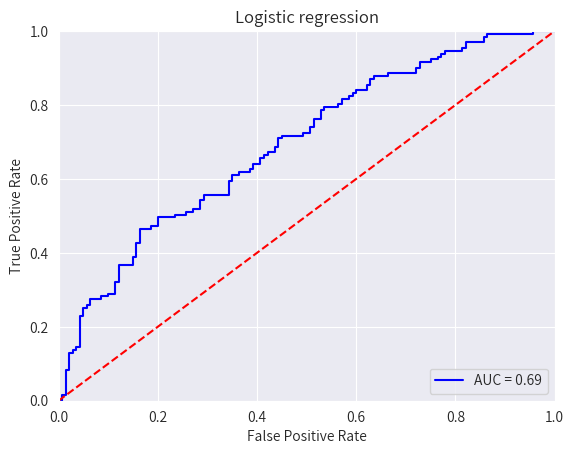

In [54]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_logistic[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Logistic regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
confusion_matrix(y_test, y_pred_logistic[:,1]>0.5)

array([[88, 52],
       [50, 81]])

In [56]:
mean_squared_error(y_test, y_pred_logistic[:,1]>0.5)

0.3763837638376384

In [57]:
1-mean_squared_error(y_test, y_pred_logistic[:,1]>0.5)

0.6236162361623616

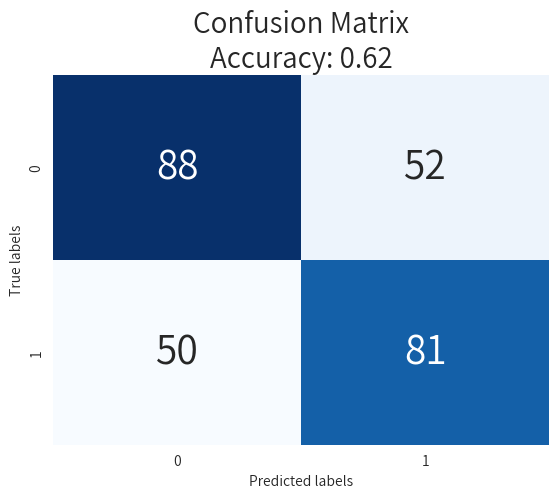

In [58]:
cm = confusion_matrix(y_test, y_pred_logistic[:,1] > 0.5)
accuracy = accuracy_score(y_test, y_pred_logistic[:, 1] > 0.5)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 28})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}', fontsize=20)
plt.show()

## LASSO

In [59]:
alphas = np.array([00.01, 0.015,0.02, 0.025, 0.03, 0.04])
model_lasso = Lasso(max_iter = 10000)
coefs = []
MSE = []
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coefs.append(model_lasso.coef_)
    MSE.append(mean_squared_error(y_val, model_lasso.predict(X_val)))

In [60]:
RMSE = np.sqrt(MSE)
RMSE

array([0.44870622, 0.4357361 , 0.43025844, 0.42845178, 0.42951176,
       0.43455826])

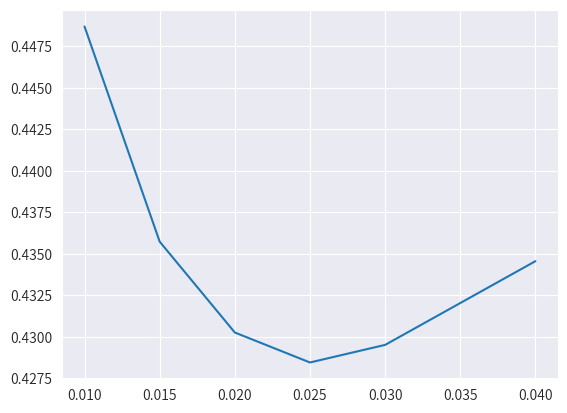

In [61]:
plt.plot(np.flip(alphas), np.flip(RMSE))

In [62]:
model_lasso.set_params(alpha=0.025)
y_lasso = model_lasso.predict(X_test)

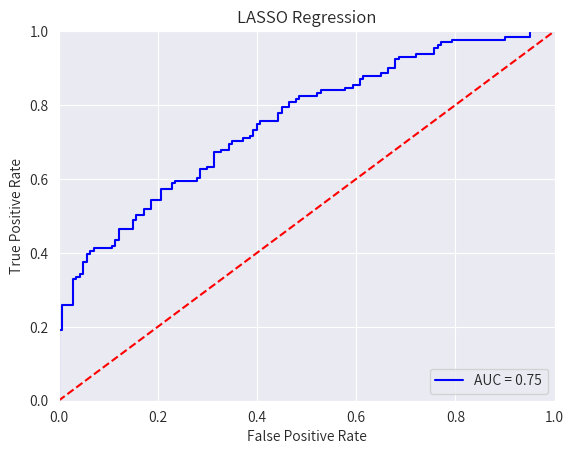

In [63]:
fpr, tpr, threshold = roc_curve(y_test, y_lasso)
roc_auc = auc(fpr, tpr)
plt.title('LASSO Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
confusion_matrix(y_test, y_lasso>0.5)

array([[93, 47],
       [42, 89]])

In [65]:
mean_squared_error(y_test,y_lasso>0.5)

0.3284132841328413

In [66]:
# accuracy = 1 - MSE
1-mean_squared_error(y_test, y_lasso>0.5)

0.6715867158671587

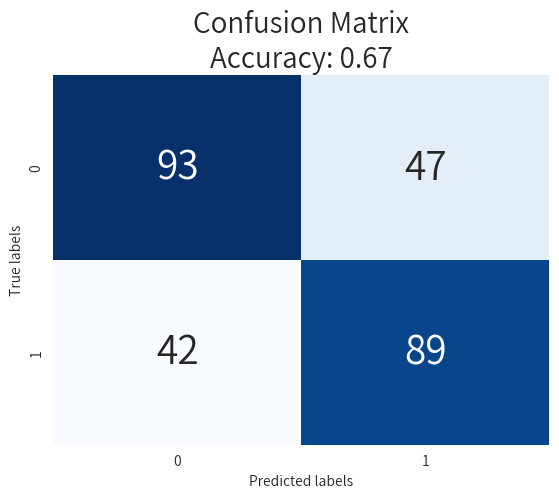

In [67]:
cm_2 = confusion_matrix(y_test, y_lasso > 0.5)
accuracy = accuracy_score(y_test, y_lasso > 0.5)

sns.heatmap(cm_2, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 28})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}', fontsize=20)
plt.show()

## Random forest

In [68]:
np.random.seed(42)
quit_rf_base = RandomForestClassifier(random_state=1)
quit_rf_base.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [69]:
quit_rf_high_feat_low_n = RandomForestClassifier(max_features = 6, n_estimators = 500, random_state=1)
quit_rf_high_feat_low_n.fit(X_train, y_train)
quit_rf_high_feat_low_n_pred = quit_rf_high_feat_low_n.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, quit_rf_high_feat_low_n_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8047172894650835

In [70]:
quit_rf_high_feat_high_n = RandomForestClassifier(max_features = 6, n_estimators = 2000, random_state=1)
quit_rf_high_feat_high_n.fit(X_train, y_train)
quit_rf_high_feat_high_n_pred = quit_rf_high_feat_high_n.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, quit_rf_high_feat_high_n_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8153121255038674

In [71]:
quit_rf_low_feat_high_n = RandomForestClassifier(max_features = 3, n_estimators = 2000, random_state=1)
quit_rf_low_feat_high_n.fit(X_train, y_train)
quit_rf_low_feat_high_n_pred = quit_rf_low_feat_high_n.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, quit_rf_low_feat_high_n_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8219304935178123

In [72]:
quit_rf = RandomForestClassifier(max_features=3, n_estimators=2000, random_state=1)
quit_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=2000, random_state=1)

In [73]:
quit_rf_pred = quit_rf.predict_proba(X_test)

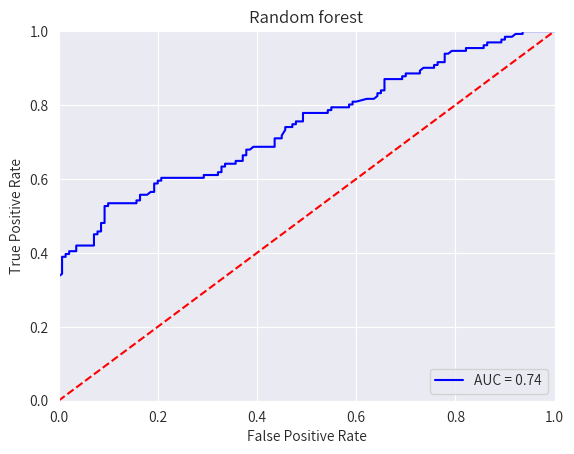

In [74]:
fpr, tpr, threshold = roc_curve(y_test, quit_rf_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Random forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
confusion_matrix(y_test, quit_rf_pred[:,1]> 0.5)

array([[112,  28],
       [ 53,  78]])

In [76]:
mean_squared_error(y_test,quit_rf_pred[:,1] > 0.5)

0.2988929889298893

In [77]:
1-mean_squared_error(y_test,quit_rf_pred[:,1]> 0.5)

0.7011070110701108

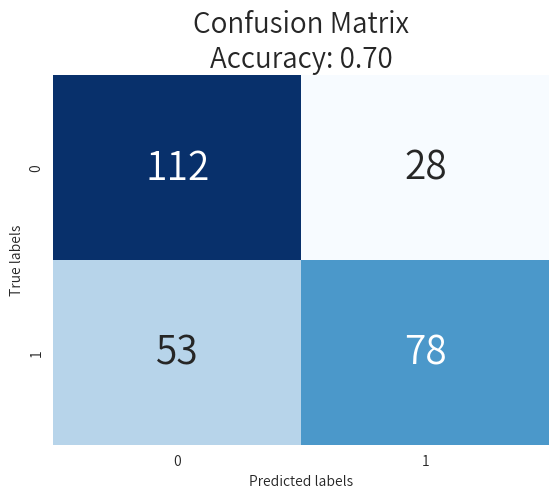

In [78]:
cm_3 = confusion_matrix(y_test, quit_rf_pred[:,1] > 0.5)
accuracy = accuracy_score(y_test, quit_rf_pred[:,1] > 0.5)

sns.heatmap(cm_3, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 28})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}', fontsize=20)
plt.show()

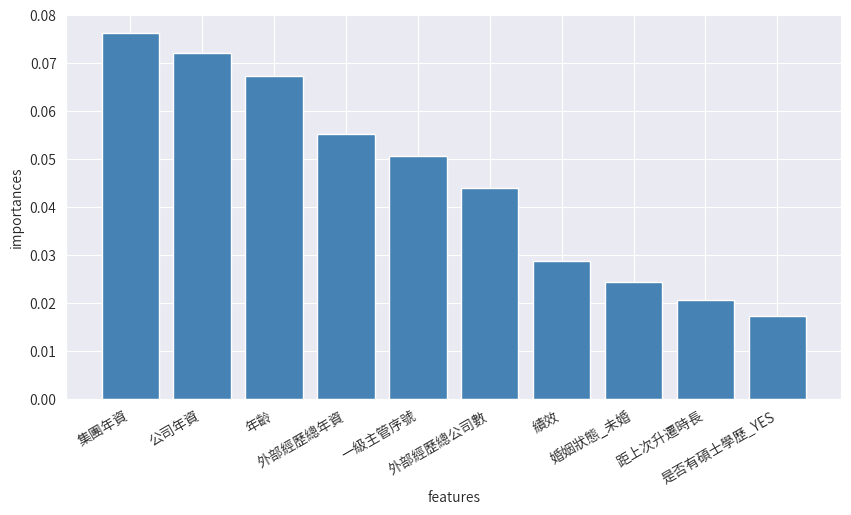

In [79]:
featureArray = list(quit.columns[1:338])

FI = pd.Series(quit_rf.feature_importances_, index = featureArray) # pySpark
FI = FI.sort_values(ascending = False)
top_10_FI = FI[:10]

fig = plt.figure(figsize=(10,5))
plt.bar(top_10_FI.index, top_10_FI.values,color="steelblue")
plt.xticks(rotation=30, ha='right')  # Set tick labels on the x-axis
plt.xlabel('features')
plt.ylabel('importances')
plt.show()

In [192]:
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
from tabulate import tabulate

models = ['Logistic Regression', 'LASSO Regression', 'Random Forest']
y_true_dict = {'Logistic Regression': y_test, 'LASSO Regression': y_test, 'Random Forest': y_test, 'Gradient Boosting': y_test, 'Neural nets': y_test}
y_pred_dict = {'Logistic Regression': y_pred_logistic[:,1]>0.5, 'LASSO Regression': y_lasso>0.5, 'Random Forest': quit_rf_pred[:,1]>0.5}

mse_list = []
accuracy_list = []

# Iterate through models
for model_name in models:
    y_true = y_true_dict[model_name]
    y_pred = y_pred_dict[model_name]

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    mse_list.append(mse)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_list.append(accuracy)

FNR = [round(50/(50+81), 3), round(42/(42+89), 3), round(53/(53+78), 3)]
auc_list = [0.69, 0.75, 0.74]
results_df = pd.DataFrame({'Model': models, 'MSE': mse_list, 'Accuracy': accuracy_list, 'AUC': auc_list, 'False Negative Rate': FNR })

print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+---------------------+--------------------+--------------------+------+---------------------+
|   |        Model        |        MSE         |      Accuracy      | AUC  | False Negative Rate |
+---+---------------------+--------------------+--------------------+------+---------------------+
| 0 | Logistic Regression | 0.3763837638376384 | 0.6236162361623616 | 0.69 |        0.382        |
| 1 |  LASSO Regression   | 0.3284132841328413 | 0.6715867158671587 | 0.75 |        0.321        |
| 2 |    Random Forest    | 0.2988929889298893 | 0.7011070110701108 | 0.74 |        0.405        |
+---+---------------------+--------------------+--------------------+------+---------------------+
